In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_utils import BasicFunctions, PriceFunctions
from TechnicalAnalysis import TechnicalAnalysis 
import math
import tensorflow as tf
from scipy.stats import linregress

%matplotlib inline

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


btc = quandl.get('BCHARTS/COINBASEUSD', start_date='2017/4/15', end_date='2017/5/15')
eth = quandl.get('GDAX/ETH_USD', start_date='2017/4/15', end_date='2017/5/15')

btc.to_csv('btc.csv')
eth.to_csv('eth.csv')

In [448]:
import pandas as pd

class Backtester:
    
    '''
    Strategy is based on this book:
    Successful Algorithmic Trading by Michael L. Halls-Moore
    '''
    
    #add margin rates and margin size too later
    def __init__(self, symbol, bars, signals, period=1, bankroll=10000, stake=1000, comission=0.2, slippage=0):
        '''
        Parameters:
        ___________
        symbol (string):
        The currency symbol. Example: BTC
        
        bars (dictionary):
        Dictionary of Pandas dataframe containing Open, Close, High and Low Value. The Close value will be used
        
        signals (dictionary):
        Dictionary of coins that contain Numpy array containg direction probablity and magnitude of change.
        
        period (int):
        Number that represents how far in the future the timeframe lies
        1 is used for classification whose target is 1 timeframe away and so on
        
        bankroll (int optional):
        The initial cash to start with
        
        stake (int optional):
        size of each trade
        
        comission (int optional):
        Comission per trade in percentage (out of 100)
        
        slippage (int optional):
        Slippage per trade in percentage (out of 100)
        '''
        
        self.symbol = symbol
        self.bars = bars
        self.signals = signals
        self.period = period
        self.bankroll = bankroll
        self.stake = stake
        self.comission = comission
        self.slippage = slippage
        #Type has open or close. Position has long or short. So 
        #long close means closing short
        #long open mean opening long
        #short open meaning opening short
        #short close meaning closing short 
        self.positions = pd.DataFrame(columns=['Coin', 'Percentage', 'Type', 'Position', 'Status'])
        
        self.perform_assertion()
    
    def perform_assertion(self):
        '''
        Check if all the values have same timeframes and if they have all required columns
        '''
        shape = self.bars[list(self.bars)[0]].shape
        
        keyList=sorted(self.bars.keys())
        
        for i, key in enumerate(keyList):
            if i > 0:
                try:
                    assert(self.bars[keyList[i]]['Date'].equals(self.bars[keyList[i-1]]['Date']))
                except AssertionError:
                    print("The dates in your dataframe do not match. The dates of {} and {} are different at".format(keyList[i], keyList[i-1]))
                
                try:
                    assert(self.signals[keyList[i]].shape == self.signals[keyList[i-1]].shape)
                except AssertionError:
                    print("The signals don't match at {} and {}".format(keyList[i], keyList[i-1]))
                    
    def set_positions(self, df):
        self.positions = df
    
    def get_avilablepercent(self):
        '''
        Checks the dataframe and finds how much percentage is tradable

        Returns:
        ________
        The percentage that is avilable to trade
        '''
        
        avilable = {}
        
        totalpercent = 100

        tempPercentage = self.positions.apply(lambda x: x['Percentage'] * -1 if x['Position'] == 'SHORT' else x['Percentage'], axis=1)
        avilablePercentage = 100 - (sum(tempPercentage))
        
        avilable['long'] = avilablePercentage
        avilable['short'] = 200 - avilable['long']
        
        return avilable
        
    def check_validity(self, position, size):
        '''
        Check if a long or short position can be opened currently.
        
        Returns:
        ________
        True if perforamble
        
        The size of long and short that can be performed if not performable
        '''
        
        avilable = self.get_avilablepercent()
        
        if position == 'SHORT':
            size = -1 * size
        
        if position == 'LONG':
            if (avilable['long'] >= size):
                return True
            else:
                return avilable['long'] 
        elif position == 'SHORT':
            if (avilable['short'] >= size):
                return True
            else:
                return avilable['short'] 
    
    def perform_trade(self, postion, size):
        '''
        Perform trade and change dataframe to reflect it
        '''
        pass
    
    def find_best(self):
        '''
        Finds the best coin to buy for that day
        '''
        
        #compare the x of the 3            
        #The one with highet probablity is chosen
        
        shape = len(self.bars[list(self.signals)[0]])
        keyList=sorted(self.signals.keys())
        bests = []
        
        best = {'probablitynorm': 0}
        
        for i in range(shape): #loop through dataframe
            for idx, key in enumerate(keyList): #to loop through dict and compare values of different
                probablity = self.signals[key][i][0]
                
                if probablity < 0.5: #if i feel confused - ofc it is working. I need the smaller number when its smaller and bigger when it is bigger
                    x = 1 - probablity
                else:
                    x = probablity
                    
                if x > best['probablitynorm']:
                    best['coin'] = key
                    best['date'] = self.bars[key]['Date'][i]
                    best['probablity'] = probablity
                    best['probablitynorm'] = x
                    best['percentage'] = self.signals[key][i][1]
                    
                    if (probablity < 0.5):
                        best['position'] = 'SHORT'
                    else:
                        best['position'] = 'LONG'
                    
                    
            bests.append(best)
            best = {'probablitynorm': 0}
        
        return bests
    
    def close_reverse_position(self, signal):
        ''' Close all reverse positions. If long signal is generated and short position is open, close it and vice versa'''
        #get signal
        #perform reverse trade
        #call perform_trade function to perform the reverse trade and change status to inactive
        pass
        
    def close_all_positions(self):
        pass
        
    def perform_backtest(self):
        data = self.find_best()
        
        for dic in data:
            prob = dic['probablity']
            perc = dic['percentage']
            coin = dic['coin']
            date = dic['date']
            pos = dic['position']
            
            if (pos == 'LONG'):
                #close if reverse position is open
                pass
            else:
                pass
        


        #write pseudocode first:
            #if 1
                #If direction > 2% or confidence >0.5 go long with 20%
                #If direction > 3% or confidence >0.6 go long with 50%
                #If direction > 4% or confidence >0.7 go long with 100%
            #if 0
                #confidence = 1 - confidence
                #then as above but short

            #Next day:
                #If already long and positive, keep going long as strategy until 100%
                #If already long and negative, close position
                #Vice Versa


        #reset best at end
        

In [449]:
import quandl
import pandas as pd
import numpy as np
from data_utils import BasicFunctions, PriceFunctions

class testBacktester:
    def __init__(self):
        
        np.random.seed(1)
        
        self.bars = {}
        self.signals = {}
        
        for i in ['btc', 'eth']:
            self.bars[i] = pd.read_csv('BackTest/tests/{}_test.csv'.format(i))
            self.bars[i]['Percentage'] = np.random.uniform(low=-0.2, high=0.2, size=self.bars[i].shape[0])
            self.bars[i]['Classification'] = self.bars[i]['Percentage'].apply(PriceFunctions().percentage_to_classification)
            self.bars[i]['Classification'] = self.bars[i]['Classification'].apply(lambda x: np.random.uniform(low=0, high=0.5) if x == 0 else np.random.uniform(low=0.5, high=1)) #adding randomness to classification

            self.signals[i] = np.asarray(self.bars[i][['Classification', 'Percentage']])
            self.bars[i]['Percentage'] = np.absolute(self.bars[i]['Percentage'])

            self.bars[i].drop(['Percentage', 'Classification'], axis=1, inplace=True)
        
    def get_dataframe(self):
        idx = ['Coin', 'Percentage', 'Type', 'Position', 'Status']

        df = pd.DataFrame(columns=idx)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 60, 'CLOSE', 'SHORT', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 100, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 100, 'CLOSE', 'SHORT', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 100, 'OPEN', 'SHORT', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 100, 'CLOSE', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'ACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'ACTIVE'], index=idx), ignore_index=True)
        
        return df
        
    def test_get_avilablepercent(self):
        bt = Backtester('BTC', self.bars, self.signals)
        
        bt.set_positions(self.get_dataframe())
        
        assert(bt.get_avilablepercent()['long'] == 60)
        assert(bt.get_avilablepercent()['short'] == 140)
        
        idx = ['Coin', 'Percentage', 'Type', 'Position', 'Status']
        
        df = pd.DataFrame(columns=idx)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 20, 'OPEN', 'LONG', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 60, 'CLOSE', 'SHORT', 'INACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 100, 'OPEN', 'SHORT', 'ACTIVE'], index=idx), ignore_index=True)
        bt.set_positions(df) 
        
        assert(bt.get_avilablepercent()['long'] == 200)
        assert(bt.get_avilablepercent()['short'] == 0)
        
        
    def test_check_validity(self):
        bt = Backtester('BTC', self.bars, self.signals)
        bt.set_positions(self.get_dataframe())
        
        assert(bt.check_validity('LONG', 60) == True)
        assert(bt.check_validity('LONG', 20) == True)
        assert(bt.check_validity('LONG', 70) != True)
        
        idx = ['Coin', 'Percentage', 'Type', 'Position', 'Status']

        df = pd.DataFrame(columns=idx)
        df = df.append(pd.Series(['BTC', 50, 'OPEN', 'SHORT', 'ACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 50, 'OPEN', 'SHORT', 'ACTIVE'], index=idx), ignore_index=True)
        bt.set_positions(df)
        
        assert(bt.check_validity('LONG', 100) == True)
        assert(bt.check_validity('LONG', 200) == True)
        assert(bt.check_validity('LONG', 201) != True)
        
        df = pd.DataFrame(columns=idx)
        df = df.append(pd.Series(['BTC', 50, 'LONG', 'SHORT', 'ACTIVE'], index=idx), ignore_index=True)
        df = df.append(pd.Series(['BTC', 50, 'LONG', 'SHORT', 'ACTIVE'], index=idx), ignore_index=True)
        bt.set_positions(df)
        
        assert(bt.check_validity('LONG', 100) == True)
        assert(bt.check_validity('LONG', 200) == True)
        assert(bt.check_validity('LONG', 201) != True)
        
    def test_perform_trade(self):
        bt = Backtester('BTC', self.bars, self.signals)
        bt.set_positions(self.get_dataframe())
        bt.perform_trade('LONG', 20)
        
    def test_close_reverse_position(self):
        bt = Backtester('BTC', self.bars, self.signals)
        bt.set_positions(self.get_dataframe())
        #bt.close_reverse_position(signal='LONG')
        
    def test_find_best(self):
        bt = Backtester('BTC', self.bars, self.signals)
        indicators = bt.find_best()
        
        assert(indicators[0]['coin'] == 'btc') #0.04917342 of btc is smaller than 0.05737299 of eth
        assert(indicators[0]['position'] == 'SHORT')
        
        assert(indicators[1]['coin'] == 'btc') #0.71055381 of btc is better than 0.47474463 of eth
        assert(indicators[1]['position'] == 'LONG')
        
        assert(indicators[2]['coin'] == 'eth') #0.72495607 of eth is better than 0.47894477 of btc
        assert(indicators[2]['position'] == 'LONG')
        
        assert(indicators[3]['coin'] == 'btc') #0.26658264 of btc is smaller than 0.28919481 of eth
        assert(indicators[3]['position'] == 'SHORT')
        
        assert(indicators[9]['coin'] == 'btc') #0.87507216 of btc is bigger than 0.80857246 of eth
        assert(indicators[9]['position'] == 'LONG')
        
    def test_perform_backtest(self):
        bt = Backtester('BTC', self.bars, self.signals)
        bt.perform_backtest()
            
testBacktester().test_get_avilablepercent()
testBacktester().test_perform_backtest()
testBacktester().test_find_best()
testBacktester().test_check_validity()
testBacktester().test_perform_trade()
testBacktester().test_close_reverse_position()

In [ ]:
bf = BasicFunctions()
pf = PriceFunctions()

In [5]:
df = pf.get_pandas(coin='BTC', targetdays=24, absolute=True) #as the data is hourly
ta = TechnicalAnalysis(df, timeframe=[24], period=[14])
ta.merge_time()

df_withta = ta.get_dic()['24hour'] #for merging 24 into 1 for now

In [10]:
# ta = TechnicalAnalysis(df, timeframe=[3,6,12,24], period=[14, 20])
# ta.merge_time()

# ta.perform('obv')
# ta.perform('macd')
# ta.perform('bollingerband')
# ta.perform('volumechange')
# ta.perform('rsi')


# df_withta = ta.get_dataframe()

#test and train should be merged while doing this

In [23]:
pd_Xtrain, pd_ytrain, pd_Xtest, pd_ytest = pf.split_traintest(df_withta)
mean, std, Xtrain, ytrain, Xtest, ytest = pf.get_numpy(pd_Xtrain, pd_ytrain, pd_Xtest, pd_ytest)

In [24]:
def create_placeholders():
    X = tf.placeholder(tf.float32, shape=(None, 5), name='X')
    y = tf.placeholder(tf.float32, shape=(None, 2), name='y')
    
    return X,y

In [25]:
def forward_propagation(X, training):
    Z1 = tf.layers.dense(X, 30, name='Z1', kernel_initializer=tf.keras.initializers.he_normal(seed=1))
    bn1 = tf.layers.batch_normalization(Z1, training=training, name='bn1')
    ac1 = tf.nn.relu(bn1, name='ac1')
    A1 = tf.layers.dropout(ac1, 0.3, name='A1')
    
    Z2 = tf.layers.dense(A1, 15, name='Z2', kernel_initializer=tf.keras.initializers.he_normal(seed=1))
    bn2 = tf.layers.batch_normalization(Z2, training=training, name='bn2')
    ac2 = tf.nn.relu(bn2, name='ac2')
    A2 = tf.layers.dropout(ac2, 0.3, name='A2')
    
    Z3 = tf.layers.dense(A2, 2, name='Z3', kernel_initializer=tf.keras.initializers.he_normal(seed=1))
    #A3 = tf.nn.relu(Z3)

    return Z3

In [71]:
def cost_function(AL, y):
    classcost = tf.reduce_mean(tf.square(y[:, 0] - AL[:, 0]))
    percost = tf.reduce_mean(tf.square(y[:, 1] - AL[:, 1]))
    
    classification  = tf.abs(tf.log(classcost))
    regression = tf.abs(tf.log(percost))
    
    cost = 0.5 * classification + 5 * regression
    
    costs = [cost, classification, regression]
    
    return costs

In [69]:
import os
cwd = os.getcwd()

from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

Iteration: 0
Classification cost: 0.7455036044120789
Regression cost: 0.033775895833969116
Total Clost: 0.1457231342792511


Iteration: 50
Classification cost: 0.10798072069883347
Regression cost: 0.007657085545361042
Total Clost: 0.020830435678362846


Iteration: 100
Classification cost: 0.09215537458658218
Regression cost: 0.015237121842801571
Total Clost: 0.016907362267374992


Iteration: 150
Classification cost: 0.176096111536026
Regression cost: 0.0031115233432501554
Total Clost: 0.03490807116031647


Iteration: 200
Classification cost: 0.13211704790592194
Regression cost: 0.018714530393481255
Total Clost: 0.024551957845687866


Iteration: 250
Classification cost: 0.04073154926300049
Regression cost: 0.012676848098635674
Total Clost: 0.006878625135868788


Iteration: 300
Classification cost: 0.20399610698223114
Regression cost: 0.0005499995895661414
Total Clost: 0.040744222700595856


Iteration: 350
Classification cost: 0.12693773210048676
Regression cost: 0.0071517848409712315
To

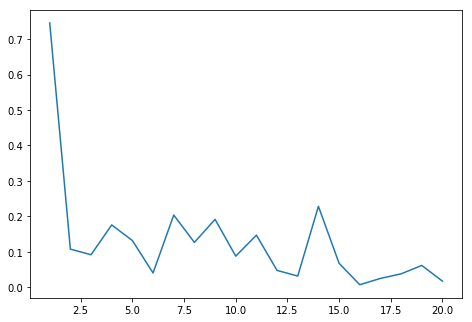

In [77]:
tf.reset_default_graph()

with tf.name_scope('Initialize'):
    X, y = create_placeholders()
    training = tf.placeholder(tf.bool, shape=(), name='training')
    
with tf.name_scope('ForwardPropagation'):
    AL = forward_propagation(X, training)
    
with tf.name_scope('CostFunction'):
    cost = cost_function(AL, ytrain)
    
with tf.name_scope('BackPropagation'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost[0])
    
init = tf.global_variables_initializer()

cost_summary = tf.summary.scalar('Cost', cost[0])
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

costs = []

with tf.Session() as sess:
    sess.run(init)
    mini_batches = bf.initialize_mini_batch(Xtrain, ytrain, batchsize=32)
    
    for i in range(1000):
        for batch in mini_batches:
            (Xbatch, ybatch) = batch
            sess.run(optimizer, feed_dict={X: Xbatch, y: ybatch, training: True})
            
        if (i % 50 == 0):
            cost_str = cost_summary.eval(feed_dict={X: Xbatch, y: ybatch, training: True})
            
            cost0 = cost[0].eval(feed_dict={X: Xbatch, y: ybatch, training: True})
            cost1 = cost[1].eval(feed_dict={X: Xbatch, y: ybatch, training: True})
            cost2 = cost[2].eval(feed_dict={X: Xbatch, y: ybatch, training: True})
            
            costs.append(cost0)
            
            print("Iteration: {}\nClassification cost: {}\nRegression cost: {}\nTotal Clost: {}\n\n".format(i, cost0, cost1, cost2))
            
            file_writer.add_summary(cost_str, i)
            
    
    saver = tf.train.Saver()
    saver.save(sess, cwd + '/tf_logs/session/session.chkp')
    file_writer.close()
    
bf.single_plot(costs, log=False)

In [78]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))

def calculate_accuracy(AL, y):
    #calculate accuracy, precision, recall and F1 value here too
    ALc = AL[:, 0]
    yc = y[:, 0]
    
    ALc = ALc > 0.5
    ALc = ALc.astype(int)
    
    total = ALc.shape[0]
    
    TP = np.sum(np.logical_and(ALc==1, yc==1))
    TN = np.sum(np.logical_and(ALc==0, yc==0))
    
    FP = np.sum(np.logical_and(ALc==1, yc==0))
    FN = np.sum(np.logical_and(ALc==0, yc==1))
    
    P = TP / (TP + FP)
    R = TP / (TP + TN)
    F1 = (2 * P * R) / (P + R)
    
    
    acc = np.sum(ALc == yc)/total
    
    
    print("\nAccuracy: {} \n".format(acc))
    print("True Positive: {} \nTrue Negative: {}\nFalse Positive: {} \nFalse Negative: {}\n".format(TP, TN, FP, FN))
    print("Precision: {} \nRecall: {} \nF1 Score: {}\n".format(P, R, F1))
    
    
    ALcr = AL[:, 1]
    ycr = y[:, 1]

    fig, axes = plt.subplots(figsize=(12,6))
    axes.plot(ALcr, label="Predicted Value")
    axes.plot(ycr, label="Actual Value")
    axes.set_ylabel("Percentage Change")
    axes.set_title("Regression Comparision")
    axes.legend(loc=4)
    
    slope, intercept, rval, pval, stderr = linregress(ycr, ALcr)
    print("R-Value: " + str(rval)) #rvalue is between -1 and 1 and can be used for single. Suitable for my purpose. R2 can be used for multiple, gives one and zero
    
    maximum = max(ycr.max(),AL.max())
    minimum = min(ycr.min(),ALcr.min())
    fig2, ax2 = plt.subplots(figsize=(12,6))
    ax2.scatter(ycr,ALcr)
    ax2.plot([minimum, maximum], [minimum, maximum], 'r-', lw=2)
    
    #plot this

INFO:tensorflow:Restoring parameters from C:\Users\User\Desktop\Dissertation\CryptoPredictor\CryptoPredictor/tf_logs/session/session.chkp

Accuracy: 0.5147058823529411 

True Positive: 507 
True Negative: 263
False Positive: 431 
False Negative: 295

Precision: 0.5405117270788913 
Recall: 0.6584415584415585 
F1 Score: 0.5936768149882904

R-Value: 0.04163573973320786


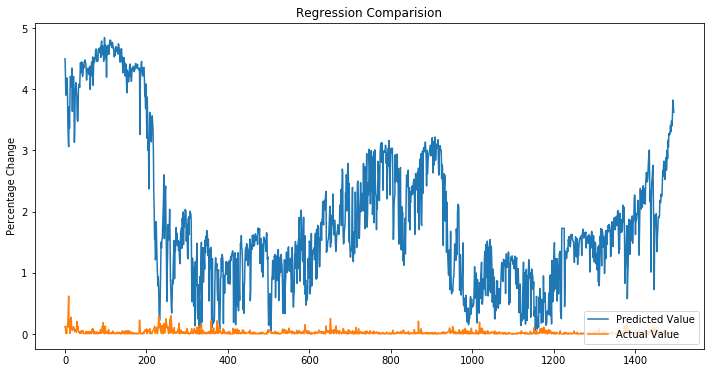

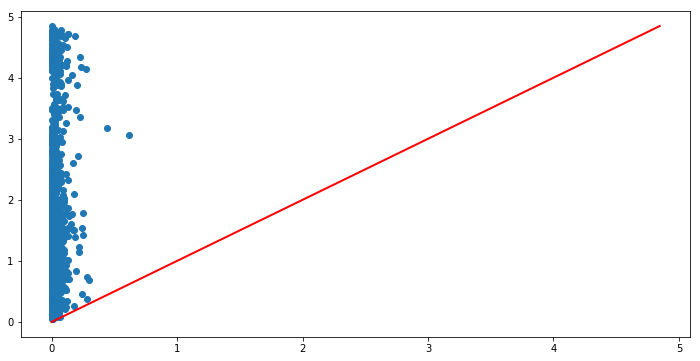

In [81]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, cwd + '/tf_logs/session/session.chkp')
    
    Z = sess.run(AL, feed_dict={X: Xtrain, training: False})
    Z[:, 0] = sigmoid(Z[:, 0])
    
    calculate_accuracy(Z, ytrain)